<a href="https://colab.research.google.com/github/Jenoprabakar/TensorFlow-lab_experiments/blob/main/TensorFlow_For_Loss_Function_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow matplotlib numpy


Epoch 0 - Loss: 362.4332
Epoch 10 - Loss: 156.0193
Epoch 20 - Loss: 44.0390
Epoch 30 - Loss: 5.6895
Epoch 40 - Loss: 1.8922
Epoch 50 - Loss: 3.1913
Epoch 60 - Loss: 2.3840
Epoch 70 - Loss: 1.5828
Epoch 80 - Loss: 1.4649
Epoch 90 - Loss: 1.4519


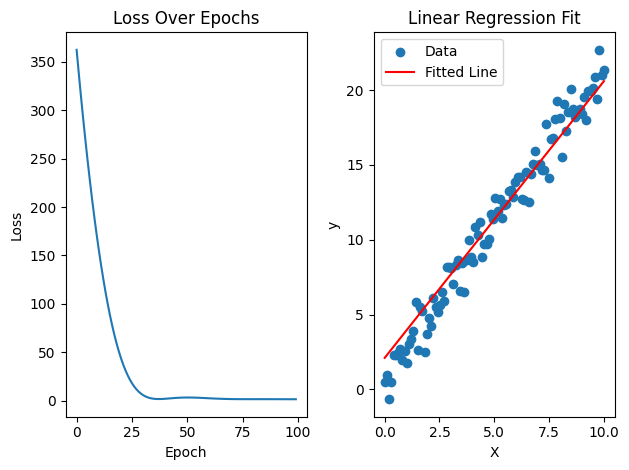

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#dataset
X = np.linspace(0, 10, 100, dtype=np.float32).reshape(-1, 1)
y = 2 * X + 1 + np.random.normal(0, 1, X.shape).astype(np.float32)
W = tf.Variable(tf.random.normal([1, 1]))#weight
b = tf.Variable(tf.random.normal([1]))#bias
def model(X):#model defining
    return tf.matmul(X, W) + b
def loss_fn(y_true, y_pred):#loss function
    return tf.reduce_mean(tf.square(y_true - y_pred))#mean squared error
optimizer = tf.optimizers.Adam(learning_rate=0.1)#adam optimizer(adaptive learning rate)

losses = []
for epoch in range(100):
    with tf.GradientTape() as tape:
        y_pred = model(X)
        loss = loss_fn(y, y_pred)

    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    losses.append(loss.numpy())

    if epoch % 10 == 0:a
        print(f"Epoch {epoch} - Loss: {loss.numpy():.4f}")
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.subplot(1, 2, 2)
plt.scatter(X, y, label="Data")
plt.plot(X, model(X), color='red', label="Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()


Epoch 0, Loss: 10.8844
Epoch 10, Loss: 4.1463
Epoch 20, Loss: 1.3550
Epoch 30, Loss: 0.8025
Epoch 40, Loss: 0.7546
Epoch 50, Loss: 0.7413
Epoch 60, Loss: 0.7181
Epoch 70, Loss: 0.7018
Epoch 80, Loss: 0.7025
Epoch 90, Loss: 0.7020


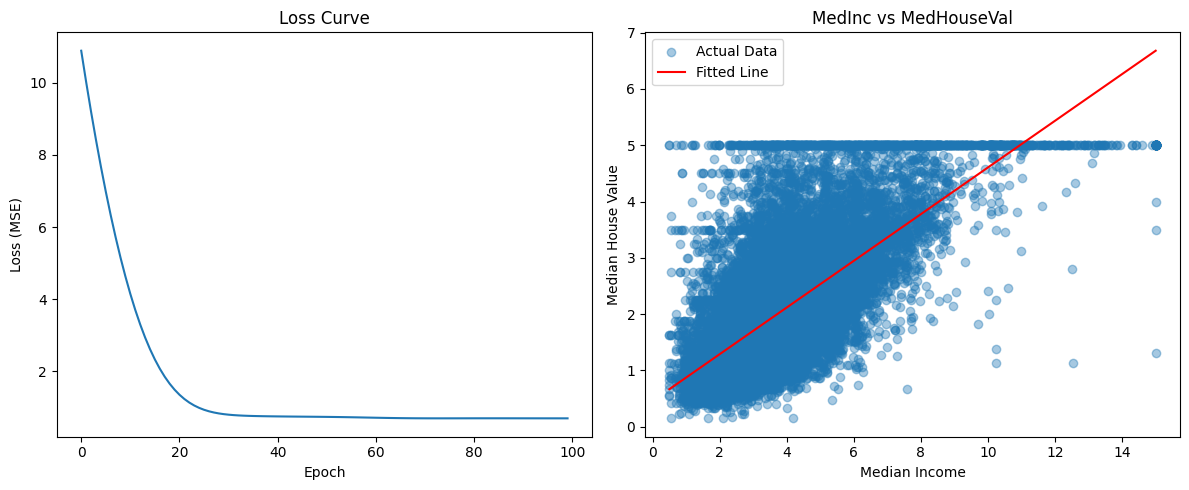

In [ ]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# 1. Load dataset
data = fetch_california_housing()
X = data.data[:, [0]]  # MedInc (first feature)
y = data.target.reshape(-1, 1)  # Target: Median House Value

# 2. Normalize X (MedInc)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X).astype(np.float32)
y = y.astype(np.float32)

# 3. Create model variables
W = tf.Variable(tf.random.normal([1, 1]))
b = tf.Variable(tf.random.normal([1]))

# 4. Define model function
def model(X):
    return tf.matmul(X, W) + b

# 5. Loss function: Mean Squared Error
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# 6. Optimizer: Adam
optimizer = tf.optimizers.Adam(learning_rate=0.1)

# 7. Training loop
losses = []
for epoch in range(100):
    with tf.GradientTape() as tape:
        y_pred = model(X_scaled)
        loss = loss_fn(y, y_pred)

    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    losses.append(loss.numpy())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.numpy():.4f}")

# 8. Plot Loss Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")

# 9. Plot Regression Line
plt.subplot(1, 2, 2)
plt.scatter(X, y, alpha=0.4, label="Actual Data")
X_line = np.linspace(X_scaled.min(), X_scaled.max(), 100).reshape(-1, 1)
y_line = model(X_line)

# Convert scaled X_line back to original MedInc
X_original = scaler.inverse_transform(X_line)

plt.plot(X_original, y_line, color='red', label='Fitted Line')
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("MedInc vs MedHouseVal")
plt.legend()

plt.tight_layout()
plt.show()


Decision Tree Rules:

|--- Outlook <= 1.50
|   |--- Windy <= 0.50
|   |   |--- class: 1
|   |--- Windy >  0.50
|   |   |--- Outlook <= 0.50
|   |   |   |--- class: 1
|   |   |--- Outlook >  0.50
|   |   |   |--- class: 0
|--- Outlook >  1.50
|   |--- Humidity <= 0.50
|   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- class: 1



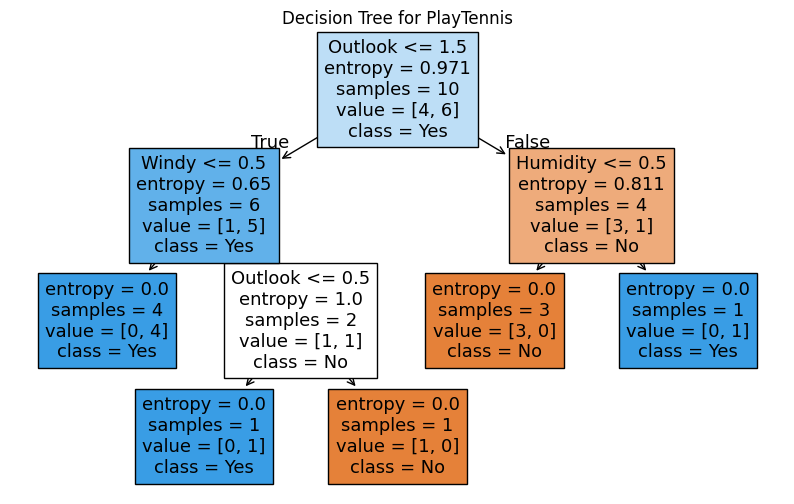

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
import matplotlib.pyplot as plt
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy',
                'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool',
                    'Cool', 'Cool', 'Mild', 'Cool', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal',
                 'Normal', 'Normal', 'High', 'Normal', 'Normal'],
    'Windy': [False, True, False, False, False,
              True, True, False, False, False],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes',
                   'No', 'Yes', 'No', 'Yes', 'Yes']
}

df = pd.DataFrame(data)
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis']
clf = DecisionTreeClassifier(criterion='entropy')  # C4.5-like with entropy
clf = clf.fit(X, y)
feature_names = X.columns
tree_rules = export_text(clf, feature_names=list(feature_names))
print("Decision Tree Rules:\n")
print(tree_rules)
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=feature_names, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree for PlayTennis")
plt.show()
